In [1]:
import torch
TORCH_VERSION = '.'.join(torch.__version__.split('.')[:2])
CUDA_VERSION = torch.__version__.split('+')[-1]
print(f'torch version: {TORCH_VERSION}; cuda version: {CUDA_VERSION};')

torch version: 1.10; cuda version: cu113;


In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
%matplotlib inline

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

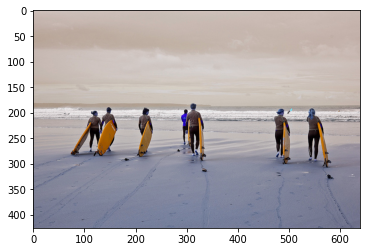

In [3]:
!wget http://images.cocodataset.org/test-stuff2017/000000018591.jpg -q -O input.jpg
im = cv2.imread('./input.jpg')
plt.imshow(im)

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # model inference threshold
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

/home/lemmyfly/miniconda3/envs/image-segmentation/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/lemmyfly/miniconda3/envs/image-segmentation/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([ 0,  0,  0,  0, 37,  0,  0, 37, 37, 37,  0, 37, 37,  0],
       device='cuda:0')
Boxes(tensor([[104.2147, 195.8371, 134.3822, 280.0844],
        [534.3419, 192.2425, 567.1771, 296.9842],
        [298.3223, 183.1826, 336.2505, 290.4058],
        [471.8355, 191.3565, 503.8513, 295.4297],
        [120.1572, 212.7897, 163.2050, 284.4707],
        [289.9129, 192.1174, 304.4970, 263.4937],
        [206.2704, 190.6376, 234.0653, 255.0701],
        [555.1885, 213.9179, 582.8718, 306.0811],
        [ 74.7640, 221.9433, 113.5055, 282.7104],
        [205.1959, 208.9362, 235.1351, 286.8276],
        [129.0365, 190.6273, 165.0436, 258.0514],
        [487.7830, 208.1732, 503.6109, 294.4518],
        [322.4793, 204.3585, 337.6866, 290.4325],
        [497.7332, 191.7526, 507.5565, 202.9861]], device='cuda:0'))


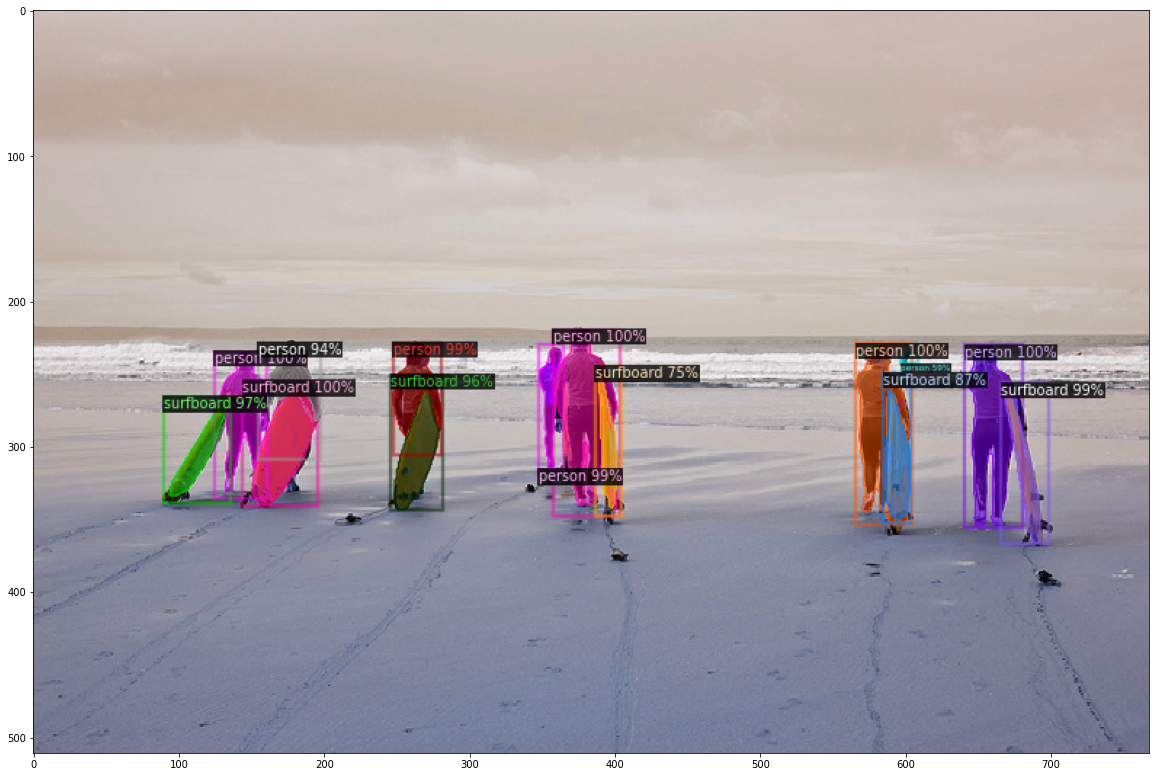

In [5]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
from digital_brain.computer_vision.model.utils.capture import Capture

capture = Capture()

while True:
    capture.start()
    cv2.imshow('raw', capture.frame)
    if capture.wait_exit():
        break

capture.cleanup()